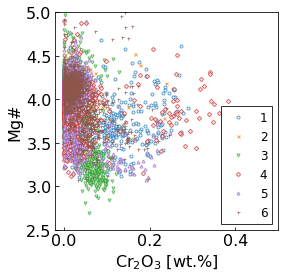

In [6]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def read_excel(px):
    filename = 'opx-line.csv'
    df = pd.read_csv(filename, encoding='utf-8', sep=',')
    
    molsi = df['SiO2'] / 60.0843
    molti = df['TiO2'] / 79.8788
    molal = df['Al2O3'] / 101.9613
    molfe = df['FeO'] / 71.8464
    molmn = df['MnO'] / 70.93745
    molmg = df['MgO'] / 40.304
    molca = df['CaO'] / 56.077
    molna = df['Na2O'] / 61.9789
    molk  = df['K2O'] / 94.195
    molcr = df['Cr2O3'] / 151.9904
    molni = df['NiO'] / 74.6894    
    coef = 6 / ( 2 * molsi + 2 * molti + 3 * molal + molfe + molmn + molmg + molca + molna + molk + 3 * molcr + molni )
    # coef = 8 / ( 2 * molsi + 3 * molal + molfe + molmg + molca + molna + molk )
    
    si = molsi * coef
    ti = molti * coef
    al = 2 * molal * coef
    fe = molfe * coef
    mn = molmn * coef
    mg = molmg * coef
    ca = molca * coef
    na = 2 * molna * coef
    k  = 2 * molk  * coef
    cr = 2 * molcr * coef
    ni = molni * coef
    
    cation = si + ti + al + fe + mn + mg + ca + na + k + cr + ni
    # cation = si + al + fe + mg + ca + na + k
    df = df[ (cation >= 3.95) & (cation < 4.04) & (df['Total'] > 97) ]
    return df

    
def get_data(df):
    mgnum = 100 * ( df['MgO'] / 40.3044 ) / ( ( df['MgO'] / 40.3044 ) + ( df['FeO'] / 71.844 ) )
    wo = 100 * ( df['CaO'] / 56.0774 ) / ( ( df['MgO'] / 40.3044 ) + ( df['FeO'] / 71.844 ) + ( df['CaO'] / 56.0774 ) )
    chromium = df['Cr2O3']
    return mgnum, chromium, wo


def main():
    df = read_excel(px)
    
    plt.rcParams["font.size"] = 16
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    fig = plt.figure( figsize=(4.0, 4.0) )
    ax1 = fig.add_subplot(111)

    cmap = plt.get_cmap('tab10')
    mks = ['o', 'x', 'v', 'D', '^', '+']
    
    units = [1, 2, 3, 4, 5, 6]
    
    for i, unit in enumerate(units):
        data = df[df['Unit']==unit]
        mgnum, chromium, wo = get_data(data)
        #ax1.plot(chromium, mgnum, mks[i], ms=3, mew=1, alpha=0.7, mfc='w', mec=cmap(i), label=units[i])
        ax1.plot(chromium, wo, mks[i], ms=3, mew=1, alpha=0.7, mfc='w', mec=cmap(i), label=units[i])
        
    ax1.set_xlim(-0.02, 0.5)
    #ax1.set_ylim(50, 80)
    ax1.set_ylim(2.5, 5)
    ax1.set_xlabel('Cr$_2$O$_3$ [wt.%]')
    ax1.set_ylabel('Mg#')
    ax1.legend(fancybox=False, edgecolor='k', fontsize=12)

    plt.savefig('comp_'+px+'.jpg', dpi=300, bbox_inches="tight")
    plt.show()
     
    
if __name__ == "__main__":
    main()

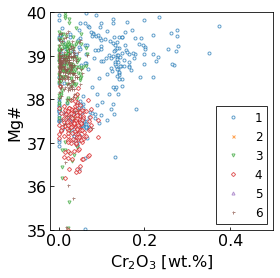

In [8]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def read_excel(px):
    filename = 'cpx-line.csv'
    df = pd.read_csv(filename, encoding='utf-8', sep=',')
    
    molsi = df['SiO2'] / 60.0843
    molti = df['TiO2'] / 79.8788
    molal = df['Al2O3'] / 101.9613
    molfe = df['FeO'] / 71.8464
    molmn = df['MnO'] / 70.93745
    molmg = df['MgO'] / 40.304
    molca = df['CaO'] / 56.077
    molna = df['Na2O'] / 61.9789
    molk  = df['K2O'] / 94.195
    molcr = df['Cr2O3'] / 151.9904
    molni = df['NiO'] / 74.6894    
    coef = 6 / ( 2 * molsi + 2 * molti + 3 * molal + molfe + molmn + molmg + molca + molna + molk + 3 * molcr + molni )
    # coef = 8 / ( 2 * molsi + 3 * molal + molfe + molmg + molca + molna + molk )
    
    si = molsi * coef
    ti = molti * coef
    al = 2 * molal * coef
    fe = molfe * coef
    mn = molmn * coef
    mg = molmg * coef
    ca = molca * coef
    na = 2 * molna * coef
    k  = 2 * molk  * coef
    cr = 2 * molcr * coef
    ni = molni * coef
    
    cation = si + ti + al + fe + mn + mg + ca + na + k + cr + ni
    # cation = si + al + fe + mg + ca + na + k
    df = df[ (cation >= 3.95) & (cation < 4.04) & (df['Total'] > 97) ]
    return df

    
def get_data(df):
    mgnum = 100 * ( df['MgO'] / 40.3044 ) / ( ( df['MgO'] / 40.3044 ) + ( df['FeO'] / 71.844 ) )
    wo = 100 * ( df['CaO'] / 56.0774 ) / ( ( df['MgO'] / 40.3044 ) + ( df['FeO'] / 71.844 ) + ( df['CaO'] / 56.0774 ) )
    chromium = df['Cr2O3']
    return mgnum, chromium, wo


def main():
    df = read_excel(px)
    
    plt.rcParams["font.size"] = 16
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    fig = plt.figure( figsize=(4.0, 4.0) )
    ax1 = fig.add_subplot(111)

    cmap = plt.get_cmap('tab10')
    mks = ['o', 'x', 'v', 'D', '^', '+']
    
    units = [1, 2, 3, 4, 5, 6]
    
    for i, unit in enumerate(units):
        data = df[df['Unit']==unit]
        mgnum, chromium, wo = get_data(data)
        #ax1.plot(chromium, mgnum, mks[i], ms=3, mew=1, alpha=0.7, mfc='w', mec=cmap(i), label=units[i])
        ax1.plot(chromium, wo, mks[i], ms=3, mew=1, alpha=0.7, mfc='w', mec=cmap(i), label=units[i])
        
    ax1.set_xlim(-0.02, 0.5)
    #ax1.set_ylim(50, 80)
    ax1.set_ylim(35, 40)
    ax1.set_xlabel('Cr$_2$O$_3$ [wt.%]')
    ax1.set_ylabel('Mg#')
    ax1.legend(fancybox=False, edgecolor='k', fontsize=12)

    plt.savefig('comp_'+px+'.jpg', dpi=300, bbox_inches="tight")
    plt.show()
     
    
if __name__ == "__main__":
    main()